In [1]:
%automagic 0


Automagic is OFF, % prefix IS needed for line magics.


# Using FSL in Jupyter 
Note: This tutorial will assumes you have some very fundamental knowledge of Python and unix shell, and installed fsl correctly on your current machine 

## Why bother?
Jupyter provides a great way to keep your code recorded and organised. And if used properly, it allows you to use bash and python together, thus making things easier. What's more, it is also a great way to show your code and results to others since it presents things well and makes every step traceable. 

## How to do it
There are a few ways that you can use FSL in a jupyter notebook. 

The **first way is the easiest** and handiest way to use which is running command line tools in jupyter notebooks. This is highly recommended.
* There are multiple ways to do it, but the simplest way is using exclamation marks `!`.
* It is possible to interact bash variables and python variables so this means you can write bash code and python code together if well formatted.

The other ways please check my other bolgs



# Use command line tool in notebook
This part mainly relies on IPython magic functions. Click [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html) to learn more about magic functions.


Note: the magic function starts with `%` only works for one line, starts with `%%` works for the whole cell 

## Exclamation mark
Use `!` in front of the code to execute it in shell and capture the output
Note: all the characters behind! will be interpreted in the shell.    

In [2]:
!ls example_data

participants.tsv  sub-101  sub-102  sub-201  sub-202  T1w.json	vbm


In [3]:
# if you use a variable to cautures the result, IPython will atuomatically segment
# it into a list which works like a normal list
folders = !ls example_data
print("Type of the variable:", type(folders))
print("Value of the variable:" , folders)

Type of the variable: <class 'IPython.utils.text.SList'>
Value of the variable: ['participants.tsv', 'sub-101', 'sub-102', 'sub-201', 'sub-202', 'T1w.json', 'vbm']


In [4]:
# The list returned by IPython have special attributes:
print(".n attr")
print(folders.n, '\n----') # return value as a string, joined on \n
print(".s attr")
print(folders.s, '\n----') # return value as a string, joined on spaces
print(".p attr")
import path
direct = !pwd
print(direct.p, '\n----') # list of path objects (requires path.py package)


.n attr
participants.tsv
sub-101
sub-102
sub-201
sub-202
T1w.json
vbm 
----
.s attr
participants.tsv sub-101 sub-102 sub-201 sub-202 T1w.json vbm 
----
.p attr
[PosixPath('/home/jzni/fsl_jupyter')] 
----


## Define an alias for a shell command.
`%alias` allows you to turn a shell command into a Python magic function

In [5]:
ex_img_dir = 'database/example_bids_data/sub-101/ses-1/anat/sub-101_ses-1_T1w.nii.gz'

In [6]:
# basic usage:
# %alias alias_name system_command
%alias feyes fsleyes
%feyes $ex_img_dir -cm "greyscale"

In [7]:
# advanced usage: you can include parameters or wildcard character(%s or %l) to represent input
# in the syntax to simplify the aliased command

# %alias alias_name system_command %s -params 
%alias feyes fsleyes %s -cm "red-yellow"
%feyes $ex_img_dir

## Run the whole cell in shell

The first way is **not actually** running the cell like other methods.     
You can use `;` and `\` to extend one line of code infinitely.      
**Note:** The advantage of this method is you can still access the variables from python kernel 

In [1]:
ls = !ls -d database/example_bids_data/*

In [2]:
!for sub in {ls} ; do \
echo $$sub ;\
done

[example_data/participants.tsv,
example_data/sub-101,
example_data/sub-102,
example_data/sub-201,
example_data/sub-202,
example_data/T1w.json]


There are multiple other ways you can run a cell in shell, they are hardly different.     
Just type `%%!` `%%system` `%%script bash` at the first line of the cell.     
**Note**: it is **not possible** to access the variable in python kernel if you are using these methods

In [10]:
%%!
for sub in `ls example_data` ; do 
echo $sub 
done

['participants.tsv', 'sub-101', 'sub-102', 'sub-201', 'sub-202', 'T1w.json']

In [11]:
%%!
for sub in {ls} ; do \
echo $$sub ;\
done

["/bin/bash: -c: line 2: syntax error near unexpected token `done'",
 "/bin/bash: -c: line 2: `done'"]

## Run a cell via a shell command

`%%script` is a very versatile magic command, the most helpful way to use this command is access other kernels through it     
for example, matlab, Rscript, SQL, Ruby, Perl etc.


In [12]:
%%script matlab
a = 1
b = 2
a + b


                            < M A T L A B (R) >
                  Copyright 1984-2021 The MathWorks, Inc.
             R2021a Update 5 (9.10.0.1739362) 64-bit (glnxa64)
                               August 9, 2021

 
To get started, type doc.
For product information, visit www.mathworks.com.
 
>> 
a =

     1

>> 
b =

     2

>> 
ans =

     3

>> 

## Variable Expansion in IPython
As you can see above, if you wnat to pass a Python Variable to your shell command via magic command, you can use `$` in front of the Python variable, or enclose variables using `{}`. 

In [13]:
ex_img_dir

'example_data/sub-101/ses-1/anat/sub-101_ses-1_T1w.nii.gz'

In [14]:
!fslinfo ex_img_dir

Image Exception : #63 :: No image files match: ex_img_dir
No image files match: ex_img_dir


In [15]:
!fslinfo $ex_img_dir

data_type	FLOAT32
dim1		256
dim2		182
dim3		256
dim4		1
datatype	16
pixdim1		0.880000
pixdim2		1.200000
pixdim3		0.880000
pixdim4		0.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+


In [16]:
!fslinfo {ex_img_dir}

data_type	FLOAT32
dim1		256
dim2		182
dim3		256
dim4		1
datatype	16
pixdim1		0.880000
pixdim2		1.200000
pixdim3		0.880000
pixdim4		0.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+


Note: If you are using a variable defined in shell, you will need `$$` in front of the variable.

In [17]:
!for sub in `ls example_data`; do \
echo $$sub ;\
done

participants.tsv
sub-101
sub-102
sub-201
sub-202
T1w.json
vbm


# An Example
The data we use is from [T1-weighted structural MRI study of cannabis users at baseline and 3 years follow up](https://openneuro.org/datasets/ds000174/versions/1.0.1). We selected four subjects from orginal dataset, two health controls and two cannabis users.

Here we will perform a simplified VBM analysis on the T1 image from the first session.

## Setup

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import contextlib
import io
import IPython.display
from shutil import copy

In [2]:
@contextlib.contextmanager
def colapsible_stdout(name: str = 'stdout'):
    """Collapse the long output of the cell"""
    f = io.StringIO()
    with contextlib.redirect_stdout(f):
        yield
        content = f.getvalue()
        content = content.replace('\n', '<br/>')
        content = IPython.display.HTML(
          f'<details><summary>{name}</summary>{content}</details>'
        )
    IPython.display.display(content)

## Preparation
### Get T1 image


In [4]:
base_dir = 'database/example_bids_data/'

In [5]:
# Create folder for analysis
%cd $base_dir/
!mkdir vbm
!mkdir vbm/raw_data
!mkdir vbm/anat_corr

/home/jzni/fsl_jupyter/example_data


In [6]:
sub_list = !ls -d sub*
sub_list[:3]

['sub-101', 'sub-102', 'sub-201']

In [7]:
# Gather T1 image
img_type = 'anat'
img_type2 = 'T1w'
ses = 'ses-1'
ending = "nii.gz"

for sub in sub_list:
    file = '{}/{}/{}/{}_{}_{}.{}'.format(
            sub, ses, img_type, sub, ses, img_type2, ending)
    copy(file, 'vbm/raw_data/')

In [8]:
# Check the T1 images
%cd vbm/raw_data
!slicesdir `imglob *`

/home/jzni/fsl_jupyter/example_data/vbm/raw_data
sub-101_ses-1_T1w
sub-102_ses-1_T1w
sub-201_ses-1_T1w
sub-202_ses-1_T1w

Finished. To view, point your web browser at
file:/home/jzni/fsl_jupyter/example_data/vbm/raw_data/slicesdir/index.html


In [52]:
!google-chrome slicesdir/index.html
%cd ..

Opening in existing browser session.
/home/jzni/fsl_jupyter/example_data/vbm


### Bias Field correction

In [11]:
# Bias Field Correction
with colapsible_stdout("fsl_anat"):
    !for sub in raw_data/sub*; do \
        fsl_anat -i $sub -o anat_corr/${sub:8:15} --noreg --nononlinreg --noseg --nosubcortseg ;\
    done


In [12]:
for sub in sub_list:
    file = 'anat_corr/{}_ses-1_.anat/T1_biascorr.nii.gz'.format(sub)
    copy(file, '{}.nii.gz'.format(sub))

### Create template list
Since images are balanced, so we pick them all. 

In [62]:
%%script bash
for sub in sub*.nii.gz; do
echo $sub >> template_list.txt
done

In [63]:
# check template_list
!head -n 3 template_list.txt

sub-101.nii.gz
sub-102.nii.gz
sub-201.nii.gz


### Create glm model

In [65]:
#!gedit ./design/design.mat

In [66]:
#!gedit ./design/design.con

In [64]:
!Glm

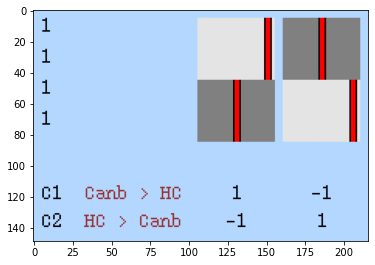

In [69]:
plt.figure(figsize=(6, 8))
im = plt.imread('./stats/design.png')
plt.imshow(im)

## Run VBM

In [73]:
%%time
with colapsible_stdout("fslvbm_1_bet"):
    !fslvbm_1_bet -N 

CPU times: user 392 ms, sys: 68.9 ms, total: 461 ms
Wall time: 2min 26s


In [74]:
%%time
with colapsible_stdout("fslvbm_2_template"):
    !fslvbm_2_template -n

CPU times: user 4.03 s, sys: 717 ms, total: 4.74 s
Wall time: 25min 58s


In [75]:
%%time
with colapsible_stdout("fslvbm_3_proc"):
    !fslvbm_3_proc

CPU times: user 2.32 s, sys: 471 ms, total: 2.79 s
Wall time: 15min 36s


# Ending

In [ ]:
from notebook.services.contents import checkpoints
checkpoints.Checkpoints.delete_all_checkpoints